In [29]:
!pip install pandas matplotlib seaborn textblob
!python -m textblob.download_corpora
!pip install vaderSentiment



Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews 

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
#Social Media sentimental analysis Using Nlp 
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\kashishparmar02\social-media-sentiments-analysis-dataset\versions\3


In [4]:
# Replace with exact filename if different
file_path = r"C:\Users\LENOVO\.cache\kagglehub\datasets\kashishparmar02\social-media-sentiments-analysis-dataset\versions\3\sentimentdataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# inspect the data 
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
#Data Wrangling\ Cleaning

def wrangle_data(df):
    """
    Cleans and preprocesses the sentiment dataset.
    """
    # Drop redundant column
    df.drop(columns='Unnamed: 0.1', inplace=True, errors='ignore')
    
    # Rename 'Unnamed: 0' to 'Id'
    df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Extract date parts
    df['Day'] = df['Timestamp'].dt.day
    df['Month'] = df['Timestamp'].dt.month
    df['Year'] = df['Timestamp'].dt.year

    # Strip whitespace from string columns
    string_cols = ['Text', 'Sentiment', 'User', 'Platform', 'Hashtags', 'Country']
    for col in string_cols:
        df[col] = df[col].astype(str).str.strip()

    # Return the cleaned DataFrame
    return df


In [7]:
#using the wrangle Function
# Load the dataset
df = pd.read_csv(file_path)

# Clean it
df = wrangle_data(df)

# Preview cleaned data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         732 non-null    int64         
 1   Text       732 non-null    object        
 2   Sentiment  732 non-null    object        
 3   Timestamp  732 non-null    datetime64[ns]
 4   User       732 non-null    object        
 5   Platform   732 non-null    object        
 6   Hashtags   732 non-null    object        
 7   Retweets   732 non-null    float64       
 8   Likes      732 non-null    float64       
 9   Country    732 non-null    object        
 10  Year       732 non-null    int32         
 11  Month      732 non-null    int32         
 12  Day        732 non-null    int32         
 13  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(6)
memory usage: 71.6+ KB


,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


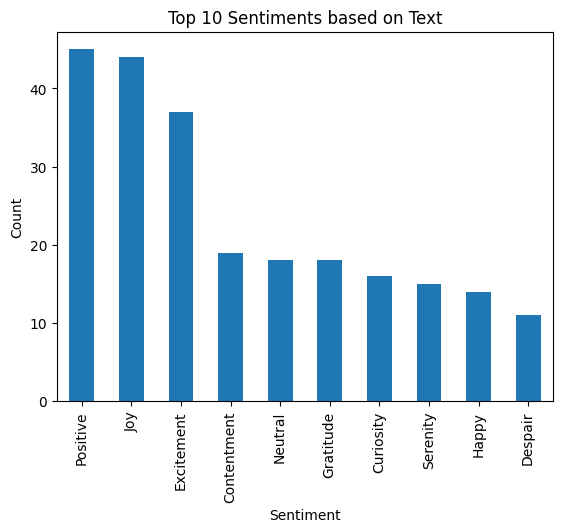

In [8]:
#EXPlainatory Data Analysis
#Top 1o sentiments based on Text
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



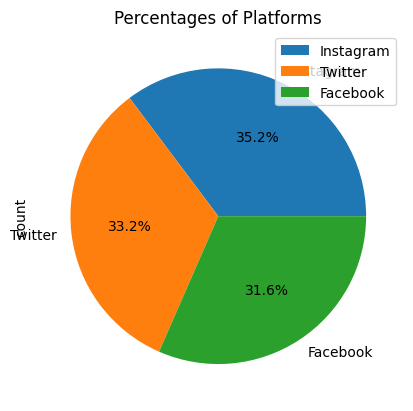

In [9]:
#percentage of platform
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

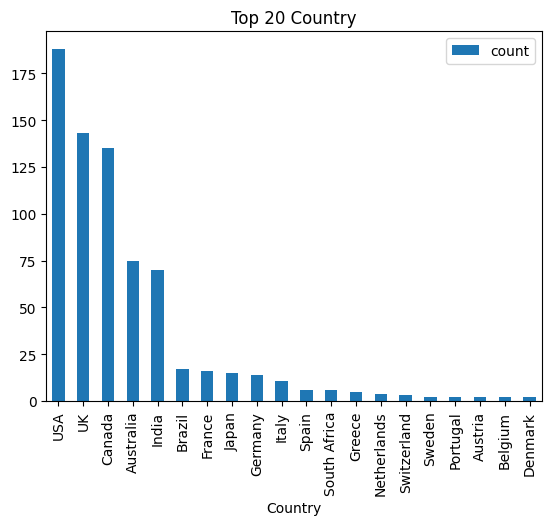

In [10]:
#Top 20 country 
df['Country'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Country')
plt.legend()
plt.show()

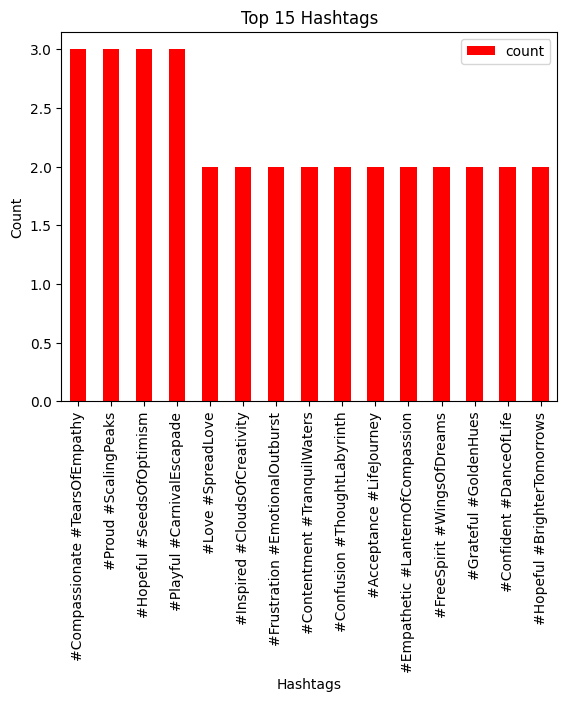

In [12]:
#top 15  hash tag
df['Hashtags'].value_counts().nlargest(15).plot(kind='bar',color= "red")
plt.title('Top 15 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

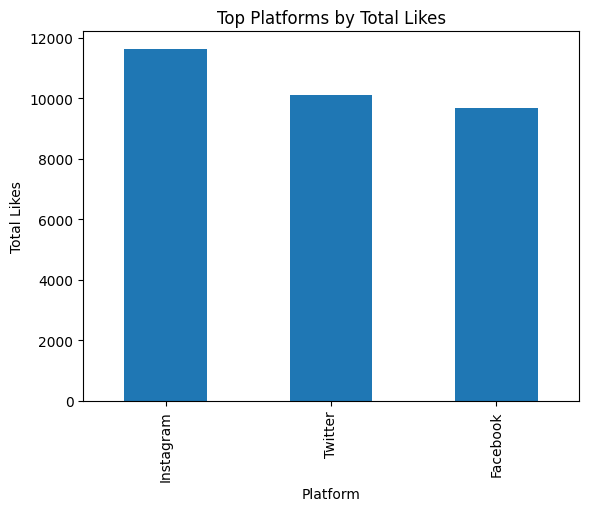

In [13]:
#top  platform liked by users
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()


In [19]:
#segment users for each platform
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

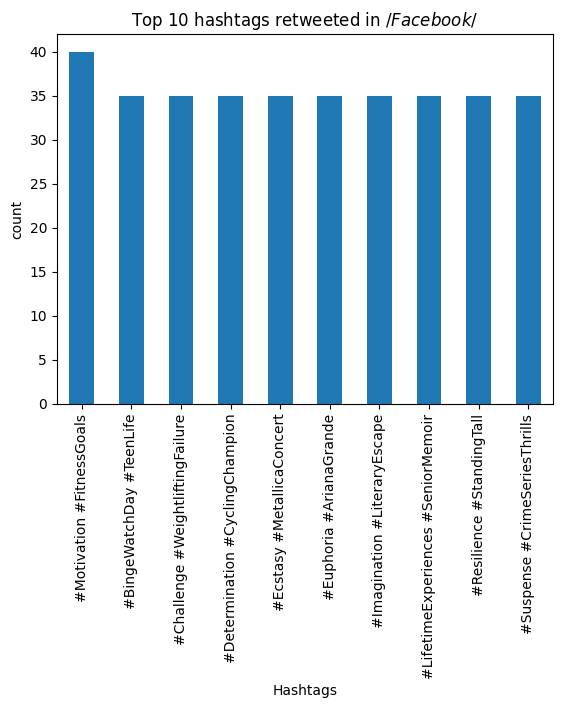

In [15]:
#Top 10 hashtags retweeted in Facebook
Facebook=df[df['Platform']=='Facebook']
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

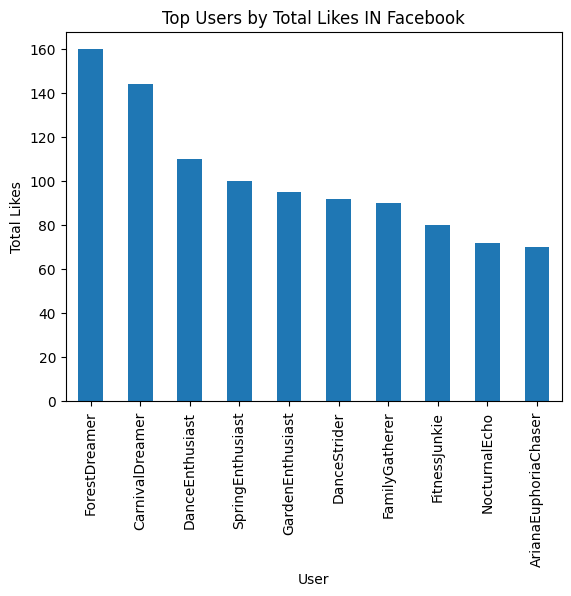

In [16]:
#Who User liked mostly ?
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

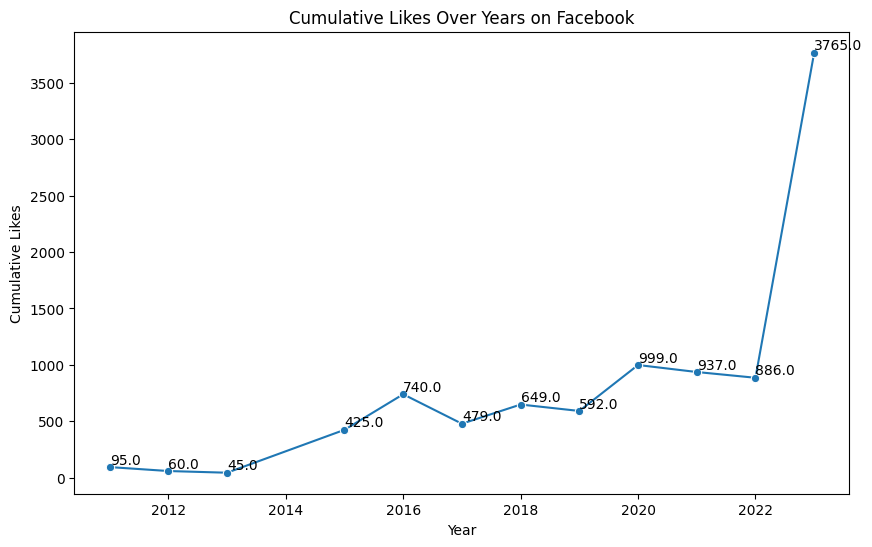

In [17]:
#Cumularative Likes overs in Facebook
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

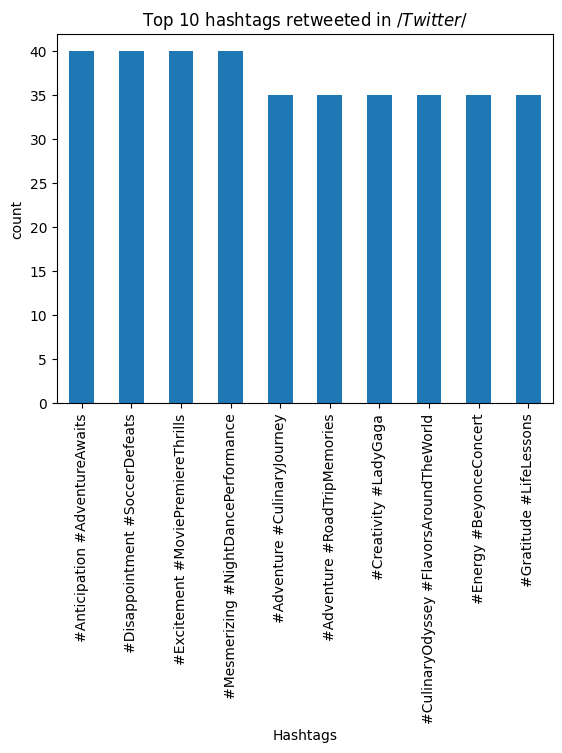

In [20]:
#Top 10 hashtags retweeted in Twitter
H_R_t=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

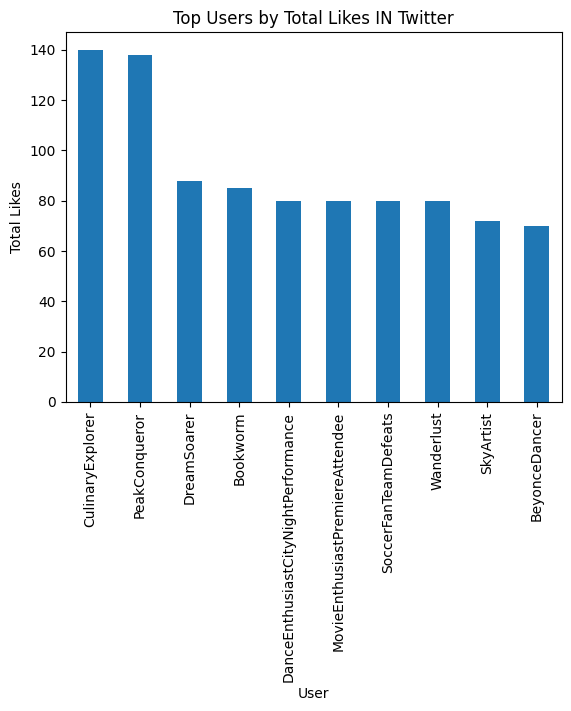

In [21]:
#Who User liked mostly 
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

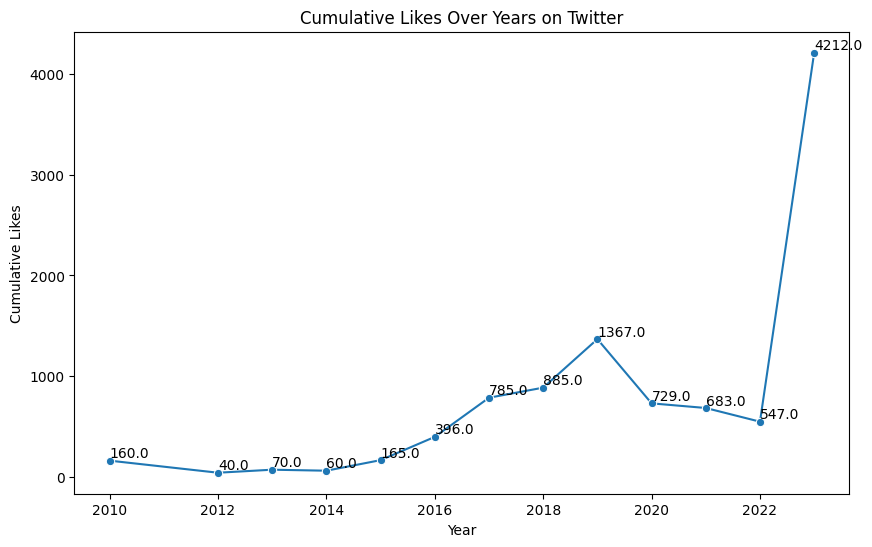

In [22]:
#Cummulative likes on twitter over years
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

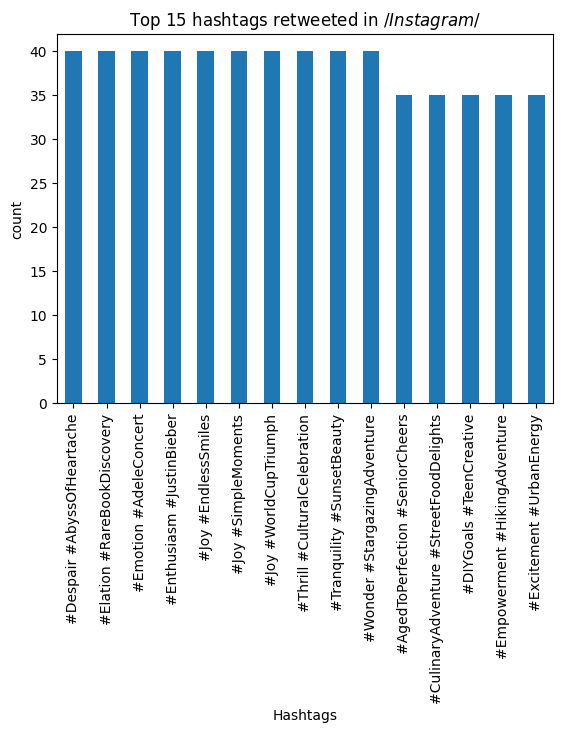

In [23]:
#Instagram
#Top 10 hashtags retweeted
H_R_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

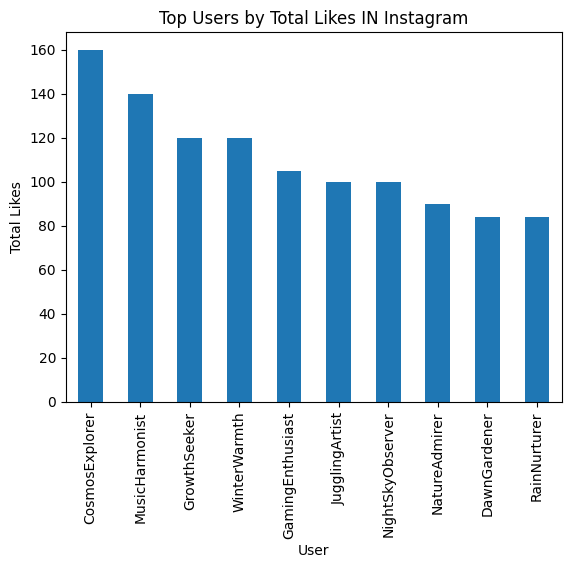

In [24]:
# Who User liked mostly ?
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top Users by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

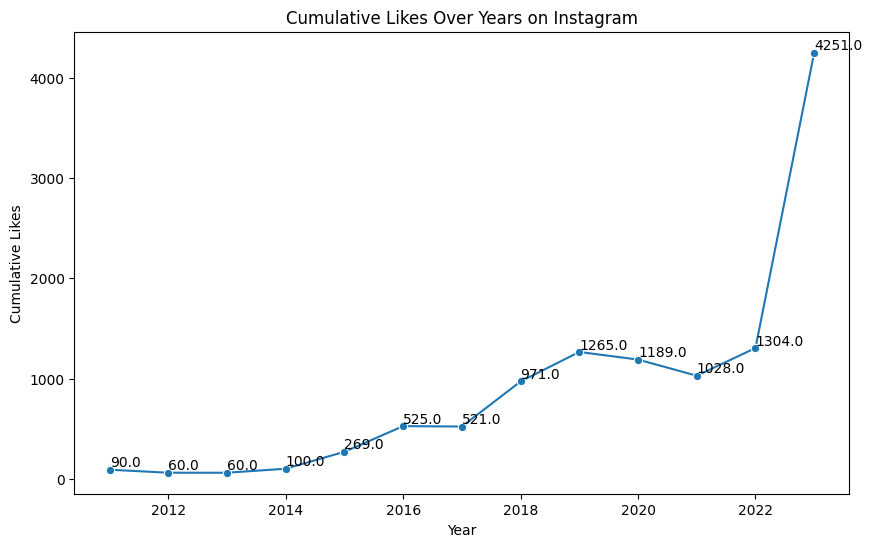

In [25]:
#Cumulative Likes Over Years on Instagram
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

In [56]:
#Sentimental analysis using NLP 
df['Sentiment'].value_counts()


Sentiment
Positive                45
Joy                     44
Excitement              37
Contentment             19
Neutral                 18
                        ..
Celestial Wonder         1
Nature's Beauty          1
Thrilling Journey        1
Whispers of the Past     1
Relief                   1
Name: count, Length: 191, dtype: int64

In [57]:
#Map 191 unique sentiments into 3 main classes:
positive_keywords = [
    'positive', 'joy', 'excite', 'content', 'happy', 'elation', 'wonder', 'beauty', 'love',
    'satisfaction', 'celebration', 'amusement', 'fun', 'hope', 'grateful', 'relief', 'thrill'
]

negative_keywords = [
    'negative', 'anger', 'sad', 'hate', 'pain', 'frustration', 'disgust', 'fear', 'grief',
    'loss', 'depression', 'worry', 'shock', 'rage', 'disappointment', 'resentment', 'guilt'
]

neutral_keywords = [
    'neutral', 'ok', 'indifferent', 'meh', 'fine', 'average', 'observation', 'reflection',
    'uncertainty', 'nostalgia', 'routine', 'memory', 'past', 'contemplation', 'so-so'
]


In [58]:
# Define Mapping Function
def simplify_sentiment(label):
    label = label.lower().strip()

    for word in positive_keywords:
        if word in label:
            return 'Positive'
    for word in negative_keywords:
        if word in label:
            return 'Negative'
    for word in neutral_keywords:
        if word in label:
            return 'Neutral'
    
    return 'Neutral'  # fallback if unmatched


In [60]:
df['Simplified_Sentiment'] = df['Sentiment'].apply(simplify_sentiment)
df['Simplified_Sentiment'].value_counts()


Simplified_Sentiment
Neutral     463
Positive    214
Negative     55
Name: count, dtype: int64

In [61]:
#oversampling to cater imbalance 
from sklearn.utils import resample

# Separate classes
neutral_df = df[df['Simplified_Sentiment'] == 'Neutral']
positive_df = df[df['Simplified_Sentiment'] == 'Positive']
negative_df = df[df['Simplified_Sentiment'] == 'Negative']

# Oversample minority classes
positive_upsampled = resample(positive_df, 
                              replace=True,
                              n_samples=463,
                              random_state=42)
negative_upsampled = resample(negative_df, 
                              replace=True,
                              n_samples=463,
                              random_state=42)

# Combine all
df_balanced = pd.concat([neutral_df, positive_upsampled, negative_upsampled])


In [62]:
df_balanced['Simplified_Sentiment'].value_counts()


Simplified_Sentiment
Neutral     463
Positive    463
Negative    463
Name: count, dtype: int64

In [63]:
#Next Steps: Preprocessing & Modeling
#Text Preprocessing 
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)     # remove hashtags
    text = re.sub(r"\d+", "", text)      # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()
    return text

df_balanced['cleaned_text'] = df_balanced['Text'].apply(clean_text)


In [64]:
#2. Convert Labels to Numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_balanced['label'] = le.fit_transform(df_balanced['Simplified_Sentiment'])
# Mapping: e.g., {'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [65]:
from sklearn.model_selection import train_test_split

X = df_balanced['cleaned_text']
y = df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [66]:
#Vectorize Text
#Use TF-IDF as a baseline vectorizer:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)



In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99        92
     Neutral       0.93      0.88      0.91        93
    Positive       0.91      0.94      0.92        93

    accuracy                           0.94       278
   macro avg       0.94      0.94      0.94       278
weighted avg       0.94      0.94      0.94       278



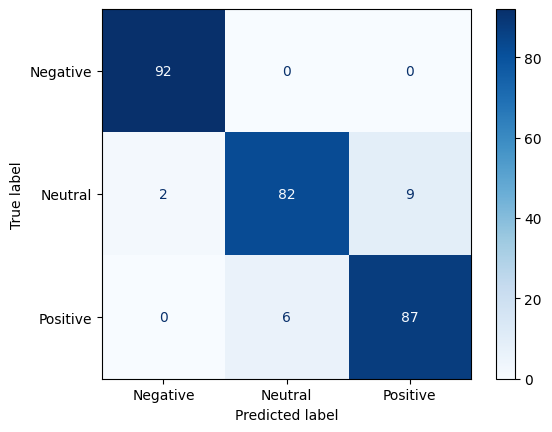

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")


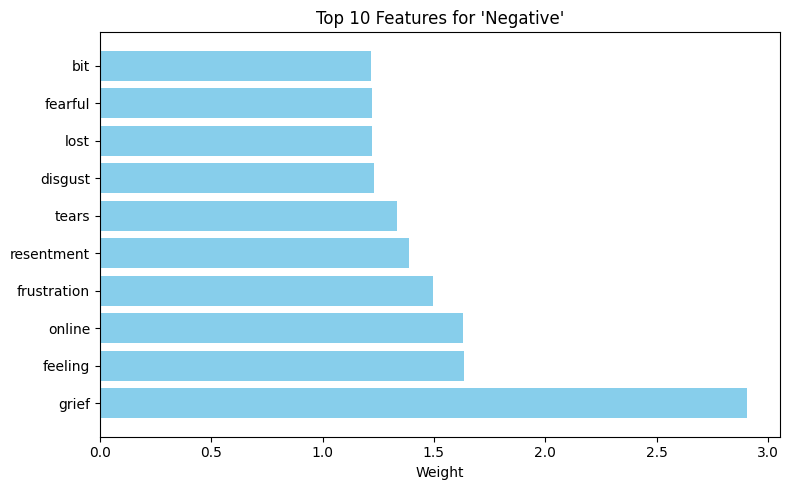

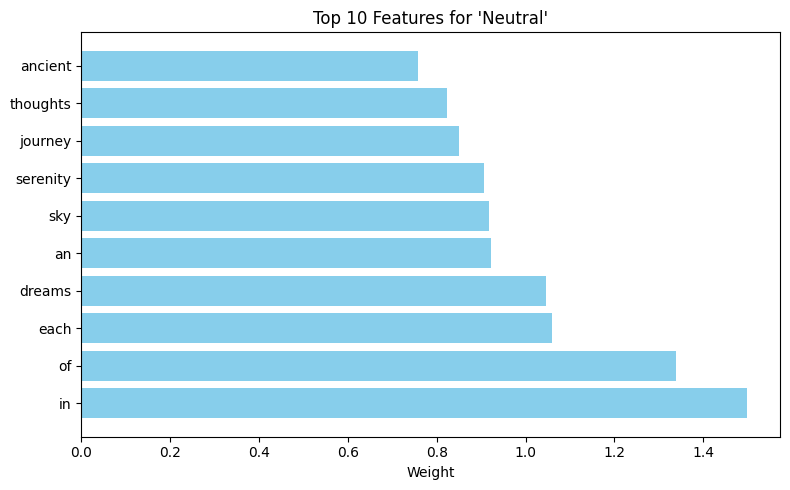

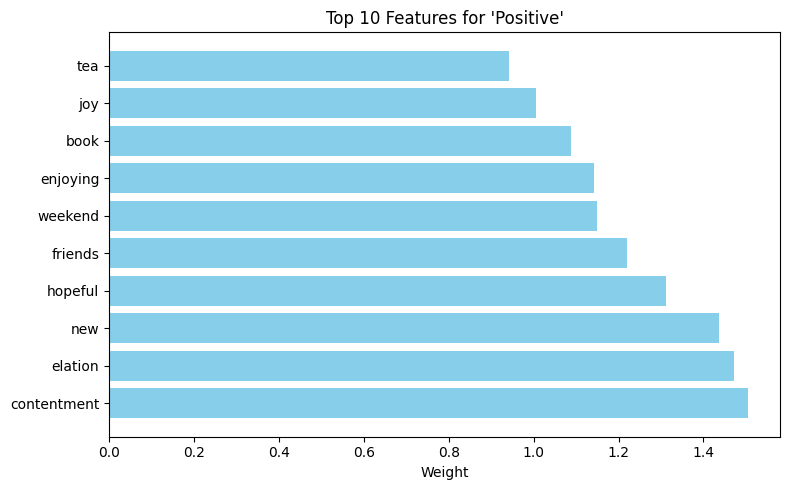

In [69]:
#Communication
import numpy as np
import matplotlib.pyplot as plt

# Get feature names from TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Loop through each class
for i, class_label in enumerate(le.classes_):
    # Get top 10 features for the current class
    top_indices = np.argsort(model.coef_[i])[-10:]
    top_features = feature_names[top_indices]
    top_weights = model.coef_[i][top_indices]

    # Create horizontal bar plot
    plt.figure(figsize=(8, 5))
    plt.barh(top_features, top_weights, color='skyblue')
    plt.xlabel('Weight')
    plt.title(f"Top 10 Features for '{class_label}'")
    plt.tight_layout()
    plt.gca().invert_yaxis()  # Highest weights at the top
    plt.show()
